# Домашняя работа по регуляризации и оптимизации

Ниже приводится корпус данных с двумя метками: 1 и -1. К данным применяется линейная модель классификации:

$f(x, \theta) = x_1 \theta_1 + x_2 \theta_2 + \theta_3.$

Предлагается подобрать параметры $\theta$ минимизируя следующую функцию ошибки:

$\mathcal{L}(\theta) = 0.1 (\theta_1^2 + \theta_2^2) + \frac{1}{N}\sum\limits_{i=1}^N \max(0, 1 - y_i f(x_i, \theta)).$

Для оптимизации предлагается использовать метод градиентного спуска с 1000 шагами размера $0.1$ из начальной точки $(1, 1, 0)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Circle
import yaml

In [3]:
X = np.array([
    [0, 1],
    [1, 1],
    [1, 0],
    [-0.5, 0.5],
    [0, -0.5]
])

y = np.array([1, 1, 1, -1, -1])

theta0 = np.array([1.0, 1.0, 0.0])

lr = 0.1

def f(X, theta):
    """Линейная функция классификации"""
    
    theta = np.asarray(theta)
    return (X * theta[:2]).sum(axis=-1) + theta[2]

def loss(X, y, theta):
    """Функция ошибки"""
    
    theta = np.asarray(theta)
    norm = (theta[:2] ** 2).sum()
    deltas = y * f(X, theta)
    return 0.1 * norm + np.mean(np.maximum(0, 1 - deltas))

print("Prediction:", f(X, theta0))
print("Loss:", loss(X, y, theta0))

Prediction: [ 1.   2.   1.   0.  -0.5]
Loss: 0.5


In [4]:
# Ваш код оптимизации.
def grad_loss(X, y, theta):
    """Градиент функции ошибки"""
    
    theta = np.asarray(theta)
    pr_norm = 0.2*theta[:2]
    pr_norm = np.append(pr_norm, 0)
    
    deltas = y * f(X, theta)
    derr = np.zeros((3, len(deltas)))
    
    for i in range(len(deltas)):
        
        if np.maximum(0, 1 - deltas[i])==0:
            derr[0, i] = 0
            derr[1, i] = 0
            derr[2, i] = 0
        
        else:
            derr[0, i] = -y[i]*X[i, 0]
            derr[1, i] = -y[i]*X[i, 1]
            derr[2, i] = -y[i]
            
    derr = np.mean(derr, axis=1)
    
    return pr_norm + derr


def step(theta, X, y, lr=0.1):
    return theta - lr*grad_loss(X, y, theta)

Обучим модель и посмотрим на полученные веса

In [11]:
theta = theta0

for _ in range(2000):
    theta = step(theta, X, y, lr=0.1)
    
theta

array([ 1.5,  1. , -0.5])

Изобразим полученную линейную гиперплоскость в пространстве

In [12]:
X1 = np.arange(-1, 1.5, 0.5)
X2 = np.arange(-1, 1.5, 0.5)
print(np.stack(np.meshgrid(X1, X2), axis=-1))

[[[-1.  -1. ]
  [-0.5 -1. ]
  [ 0.  -1. ]
  [ 0.5 -1. ]
  [ 1.  -1. ]]

 [[-1.  -0.5]
  [-0.5 -0.5]
  [ 0.  -0.5]
  [ 0.5 -0.5]
  [ 1.  -0.5]]

 [[-1.   0. ]
  [-0.5  0. ]
  [ 0.   0. ]
  [ 0.5  0. ]
  [ 1.   0. ]]

 [[-1.   0.5]
  [-0.5  0.5]
  [ 0.   0.5]
  [ 0.5  0.5]
  [ 1.   0.5]]

 [[-1.   1. ]
  [-0.5  1. ]
  [ 0.   1. ]
  [ 0.5  1. ]
  [ 1.   1. ]]]


In [13]:
X[:, 0]

array([ 0. ,  1. ,  1. , -0.5,  0. ])

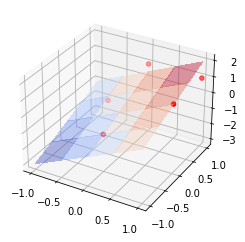

In [14]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X1 = np.arange(-1, 1.5, 0.5)
X2 = np.arange(-1, 1.5, 0.5)
X1, X2 = np.meshgrid(X1, X2)
X = np.stack([X1, X2], axis=-1)
F = f(X, theta)

ax.plot_surface(X1, X2, F, cmap=cm.coolwarm, alpha=0.4, linewidth=0, antialiased=False, zorder=100)

X = np.array([
    [0, 1],
    [1, 1],
    [1, 0],
    [-0.5, 0.5],
    [0, -0.5]
])
#PL = ((sigmoid(A @ point + b) - t) ** 2).sum()
ax.scatter(X[:, 0], X[:, 1], y, marker="o", color="r")

plt.show()

In [15]:
print("Prediction:", f(X, theta))
print("Loss:", loss(X, y, theta))

with open("submission.yaml", "w") as fp:
    yaml.safe_dump({"tasks": [{"task1": {"answer": theta.tolist()}}]}, fp)

Prediction: [ 0.5   2.    1.   -0.75 -1.  ]
Loss: 0.475
